# 3. Plotting for EDA For Haberman Dataset 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


haberman = pd.read_csv("haberman.csv")



In [2]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
print (haberman.shape)
#Haberman dataset has 306 rows and 4 coloumns

(306, 4)


In [4]:
print (haberman.columns)

# Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
haberman["status"].value_counts()

# We can observe that the haberman is imabalanced dataset as the number of points for the 1 is 225 and 2 is 81

1    225
2     81
Name: status, dtype: int64

# OBJECTIVE

Our objective is to find whether the patient after the treatment for breast cancer survives for more than 5 years or not

# 2-D Plot

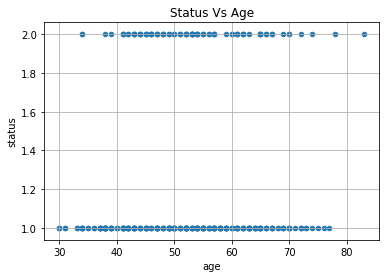

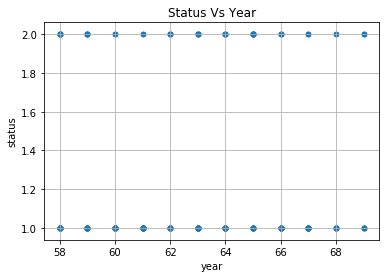

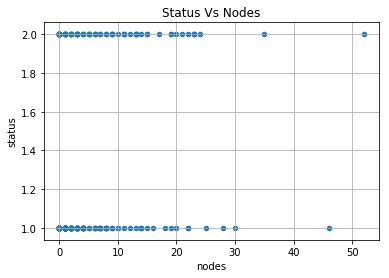

In [6]:
haberman.plot(kind='scatter', x='age', y='status') ;
plt.title("Status Vs Age")
plt.grid()
plt.show()

haberman.plot(kind='scatter', x='year', y='status') ;
plt.title("Status Vs Year")
plt.grid()
plt.show()

haberman.plot(kind='scatter', x='nodes', y='status') ;
plt.title("Status Vs Nodes")
plt.grid()
plt.show()


From the graph Age Vs Survival Status, we could oberve no kind of dependency on basis of age alone as every year patients died for less than 5 years and survived for more than 5 years
From the graph Year Vs Survival Status, we could oberve no kind of dependency on basis of year as every year patients died for less than 5 years and survived for more than 5 years
From the graph Nodes Vs Survival Status, we could oberve no kind of dependency on basis of nodes as patients died for less than 5 years and survived for more than 5 years for same Number of positive axillary nodes detected.


So, lets check for the cobinations of 2 or more columns

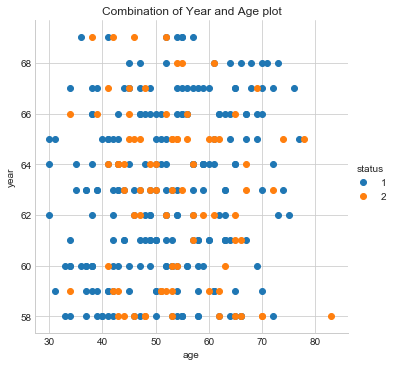

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=5).map(plt.scatter, 'age', 'year').add_legend();
plt.title("Combination of Year and Age plot")
plt.show();


Using the combinations of 2 features, we cant distinguish anything, as mnay of them were overlapping
Lets try combining 3 features

In [9]:
plt.close()

#   Pair-plot

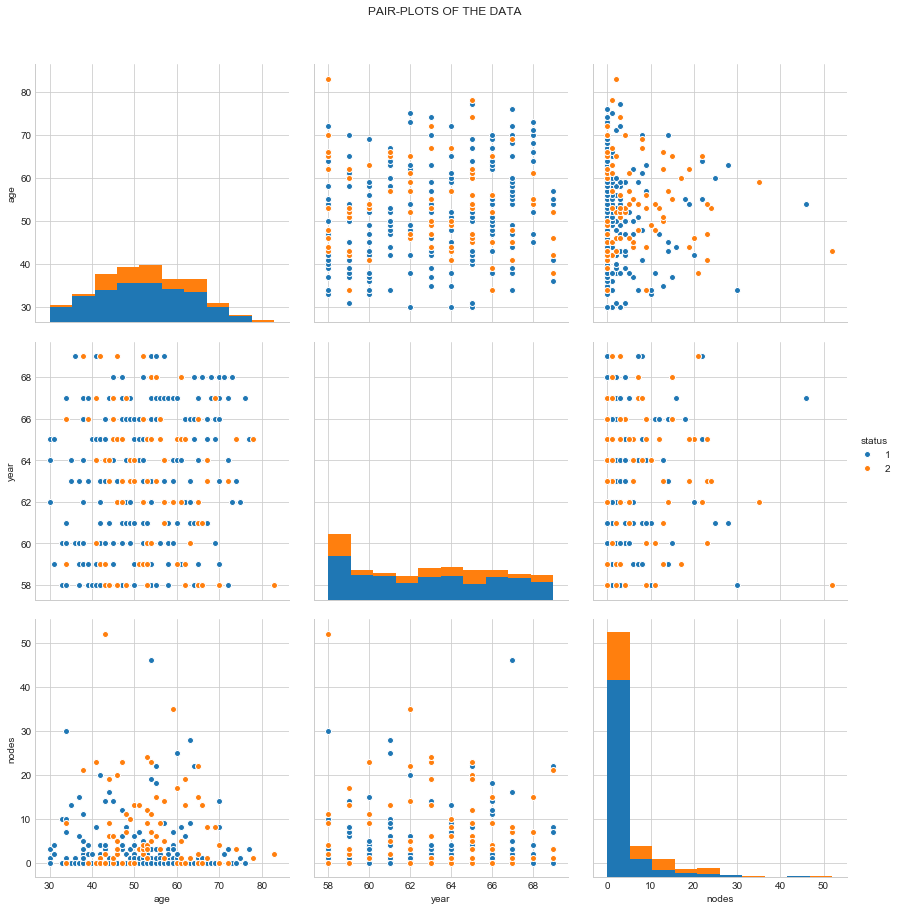

In [15]:
sns.set_style("whitegrid");
g = sns.pairplot(data = haberman, hue="status", size=4, vars = ['age','year','nodes']);
g.fig.suptitle("PAIR-PLOTS OF THE DATA",y = 1.05)
plt.show()

**Observations**
1. age is the most useful features to identify status of a patient.
2. if age <= 35 then there is a greater chance of being alive for 5 or more years
3. We can find "lines" and "if-else" conditions to build a simple model to classify the status for the age <=35.
4. No 2 combinations are that useful. So, we will go with the univariate analysis

# (3.4) Histogram, PDF, CDF

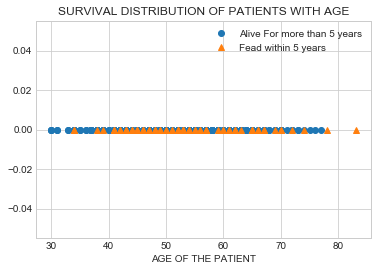

In [16]:
import numpy as np
haber_alive = haberman.loc[haberman["status"] == 1];
haber_dead = haberman.loc[haberman["status"] == 2];
plt.plot(haber_alive["age"], np.zeros_like(haber_alive["age"]), 'o',label = 'Alive For more than 5 years')
plt.plot(haber_dead["age"], np.zeros_like(haber_dead["age"]), '^',label = 'Fead within 5 years')
plt.title("SURVIVAL DISTRIBUTION OF PATIENTS WITH AGE")
plt.xlabel("AGE OF THE PATIENT")
plt.legend()
plt.show()

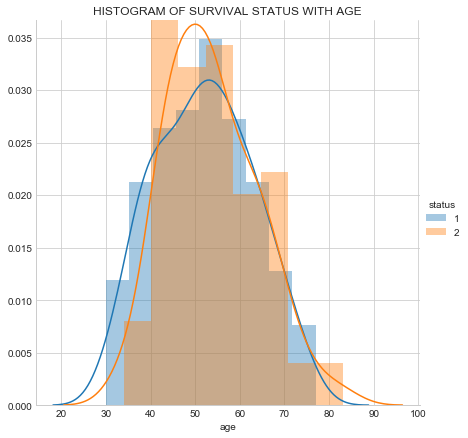

In [18]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(haberman, hue="status", size=6).map(sns.distplot, "age").add_legend();
plt.title("HISTOGRAM OF SURVIVAL STATUS WITH AGE")
plt.show();



**Obersvations**

1.If the age is less than the 35, the probability that patient survives more than 5 years is more

2.If the age is more than the 78, the probability that patient dies within 5 years is more

The remaing age gap is unambigious


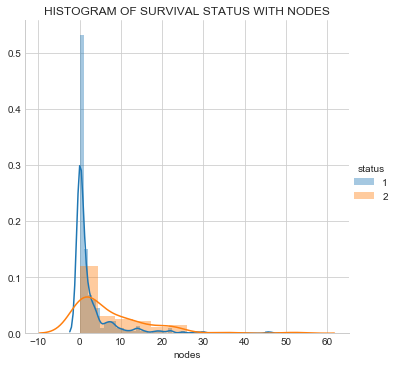

In [19]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("HISTOGRAM OF SURVIVAL STATUS WITH NODES")
plt.show();

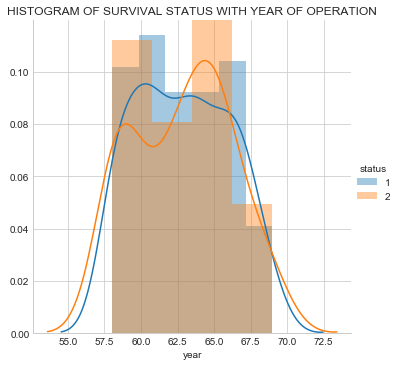

In [21]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("HISTOGRAM OF SURVIVAL STATUS WITH YEAR OF OPERATION")
plt.show();

**Obersvations**

Nothing can be dervied fro the above 2 histograms. There's so much ambiguity

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


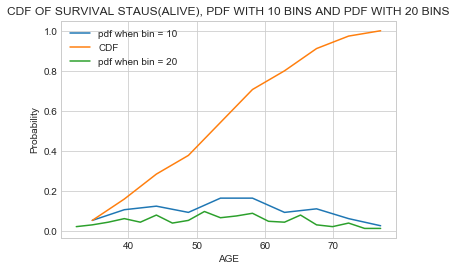

In [24]:
counts, bin_edges = np.histogram(haber_alive['age'], bins=10,density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label = 'pdf when bin = 10');
plt.plot(bin_edges[1:], cdf,label = 'CDF')

counts, bin_edges = np.histogram(haber_alive['age'], bins=20,density = True)

pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf,label = 'pdf when bin = 20');
plt.legend();
plt.xlabel("AGE")
plt.ylabel("Probability")
plt.title("CDF OF SURVIVAL STAUS(ALIVE), PDF WITH 10 BINS AND PDF WITH 20 BINS")
plt.show();


**Obersvations**

1.If the age is greater than the 55, then there is 60% chance of not surviving more than 5 years
2.If the age is greater than the 62, then there is 80% chance of not surviving more than 5 years
3.Bin=10 has much better PDF than Bin = 20



[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


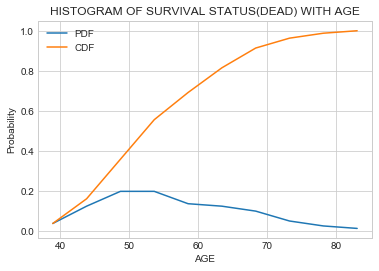

In [23]:
counts, bin_edges = np.histogram(haber_dead['age'], bins=10,density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "PDF")
plt.plot(bin_edges[1:], cdf,label = "CDF")
plt.legend();
plt.xlabel("AGE")
plt.ylabel("Probability")
plt.title("HISTOGRAM OF SURVIVAL STATUS(DEAD) WITH AGE")
plt.show();

**Obersvations**

1.The surviving of more than 5 years chances increases till 50 years (20%) and then decreases with growth of age

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


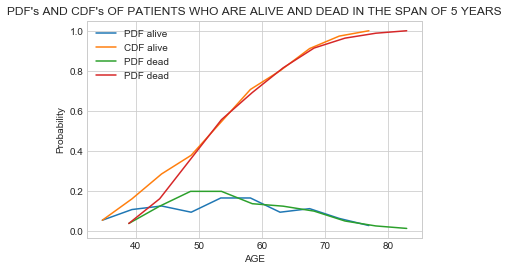

In [25]:
counts, bin_edges = np.histogram(haber_alive['age'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "PDF alive")
plt.plot(bin_edges[1:], cdf,label = "CDF alive")


# haber_dead
counts, bin_edges = np.histogram(haber_dead['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "PDF dead")
plt.plot(bin_edges[1:], cdf,label = "PDF dead")
plt.legend();
plt.xlabel("AGE")
plt.ylabel("Probability")
plt.title("PDF's AND CDF's OF PATIENTS WHO ARE ALIVE AND DEAD IN THE SPAN OF 5 YEARS")
plt.show();

# Mean, Variance and Std-dev

In [16]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haber_alive["age"]))
#Mean with an outlier.
print(np.mean(np.append(haber_alive["age"],5000)));
print(np.mean(haber_dead["age"]))

print("\nStd-dev:");
print(np.std(haber_alive["age"]))
print(np.std(np.append(haber_alive["age"],5000)))
print(np.std(haber_dead["age"]))

Means:
52.01777777777778
73.91150442477876
53.67901234567901

Std-dev:
10.98765547510051
328.58884542338734
10.10418219303131


**Observation**

Mean, variance is changing rapidly for one value

#  Median, Percentile, Quantile, IQR, MAD

In [17]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haber_alive["age"]))
#Median with an outlier
print(np.median(np.append(haber_alive["age"],50)));
print(np.median(haber_dead["age"]))


print("\nQuantiles:")
print(np.percentile(haber_alive["age"],np.arange(0, 100, 25)))
print(np.percentile(haber_dead["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haber_alive["age"],90))
print(np.percentile(haber_dead["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haber_alive["age"]))
print(robust.mad(haber_dead["age"]))



Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# Box plot and Whiskers

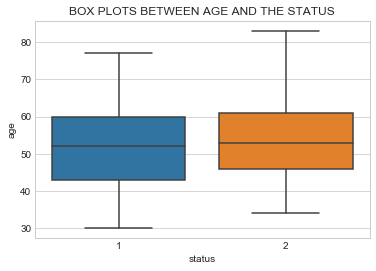

In [28]:
sns.boxplot(x='status',y='age', data=haberman)
plt.title("BOX PLOTS BETWEEN AGE AND THE STATUS")
plt.show()

**Observations**

Patients who survived for 5 or more has(all values are approx)
1. 50th percentile : 53
2. 25th percentile : 43
3. 75th percentile : 60
4. Whiskers are min max of age of the people of this cateogry

-> IQR = 17

Patients who didn't survived for 5 or more has(all values are approx)
1. 50th percentile : 54
2. 25th percentile : 46
3. 75th percentile : 62
4. Whiskers are min max of age of the people of this cateogry

-> IQR = 16


# (3.8) Violin plots

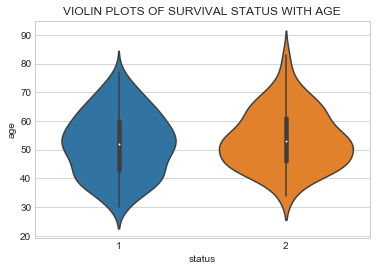

In [29]:
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.title("VIOLIN PLOTS OF SURVIVAL STATUS WITH AGE")
plt.show()

1. In the orange plot we can observe that its wider at the age of 50. So we could say that there are larger number of people  at the age of 50 would have survived more than 5 years


# Multivariate probability density, contour plot.


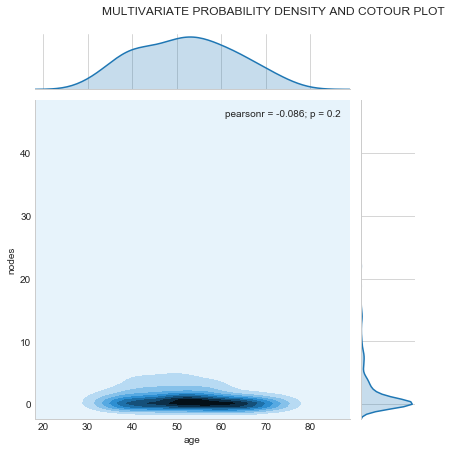

In [38]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=haber_alive, kind="kde");
plt.title("MULTIVARIATE PROBABILITY DENSITY AND COTOUR PLOT",x = -1.6,y = 1.25)
plt.show();


# CONCLUSIONS

1. The Patients survived for more than 5 years are a bit greater in number for patients treated a few years back than those of patients treated many year back So we could say that the technology advancement has helped the patients suffering from the breast cancer
2. Age factor : The patients who were old didn't make for more than 5 years mostly but those who were young survived for more than 5 years